# 用Tensorflow API ： tf.keras 搭建网络八股

## 第一步 导入相关模块

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras import datasets
from IPython.display import Image, display
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense, Flatten
import numpy as np

2023-12-10 09:39:32.378377: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 09:39:32.378458: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 09:39:32.378536: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 09:39:32.387951: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 第二步 准备训练集和测试集

In [2]:
# 指定训练集和测试集
train , test = datasets.mnist.load_data()
# 训练集 
x_train = train[0].reshape((60000, 28, 28, 1)).astype('float32') / 255
# 训练集标签
y_train = train[1]
# 测试集
x_test = test[0].reshape((10000, 28, 28, 1)).astype('float32') / 255
# 测试集标签
y_test = test[1]
# 将标签进行独热编码
train_labels = utils.to_categorical(y_train)
test_labels = utils.to_categorical(y_test)

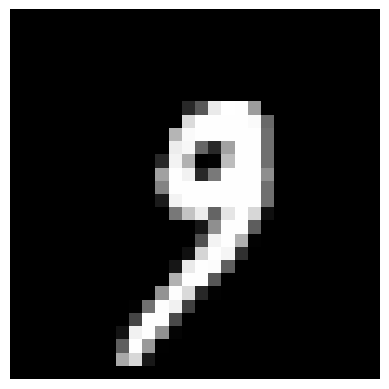

'标签是：9'

In [3]:
# cmap='gray'表示灰度图像，根据实际情况选择
plt.imshow(x_test[1000], cmap='gray') 
# 关闭坐标轴
plt.axis('off') 
# 显示图像 
plt.show()
f'标签是：{y_test[1000]}'

## 第三步 在Sequential 中搭建网络结构

In [4]:
model = Sequential()
# 添加层
model.add(Flatten(input_shape=(28, 28, 1)))  # 将输入展平为一维数组

# 添加隐藏层
model.add(Dense(128, activation='relu'))  # 使用ReLU激活函数的全连接层

# 添加输出层
model.add(Dense(10, activation='softma)x')  # 使用softmax激活函数的输出层，输出10个类别的概率分布

2023-12-10 09:39:35.579422: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:03:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-10 09:39:35.592540: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:03:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-10 09:39:35.592640: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:03:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-10 09:39:35.598446: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:03:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-10 09:39:35.598544: I tensorflow/compile

## 第四步 在compile中选择优化器/损失函数/评测指标

In [5]:
# 编译模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 第五步 fit 告知训练集和测试集的输入特征和标签/batch/迭代次数

In [6]:
# 训练模型
model.fit(x_train, 
          train_labels, 
          epochs = 5,
          batch_size =64,
          validation_data =(x_test, test_labels))

Epoch 1/5


2023-12-10 09:39:41.129999: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-10 09:39:41.251339: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1c19acc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-10 09:39:41.251402: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla M40 24GB, Compute Capability 5.2
2023-12-10 09:39:41.259416: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-10 09:39:41.533530: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-12-10 09:39:41.679128: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


938/938 [==============================] - 20s 19ms/step - loss: 0.2980 - accuracy: 0.9161 - val_loss: 0.1605 - val_accuracy: 0.9518
Epoch 2/5
938/938 [==============================] - 17s 19ms/step - loss: 0.1346 - accuracy: 0.9600 - val_loss: 0.1127 - val_accuracy: 0.9659
Epoch 3/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0952 - accuracy: 0.9725 - val_loss: 0.0976 - val_accuracy: 0.9700
Epoch 4/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0709 - accuracy: 0.9798 - val_loss: 0.0833 - val_accuracy: 0.9741
Epoch 5/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0555 - accuracy: 0.9830 - val_loss: 0.0739 - val_accuracy: 0.9751


## 第六步 summary 打印网络的结构和参数统计

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 最后 测试训练效果

In [8]:
x_test_reshaped = np.reshape(x_test, (-1, 28, 28, 1))
predictions = model.predict(x_test_reshaped)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 5ms/step


In [9]:
predicted_labels[1000]

9